# Overview

This week we'll talk about advanced network measures (beyond the degree distribution), and communities. We will use these tools to make sense of the network of the house of representatives on Wikipedia. 
This is the outline for today:


* Visualization and qualitative analysis of the house of representatives network 
* Properties of the network structure, including how parties and states shape the network

> *Reading*: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into section 9.4 in the exercises below. We will also talk a little bit about degree correlations - you can read about those in Chapter 7\.
> 



# A) Visualize the house of representatives network


> _Exercise_ 1: Pick one of the houses of representatives (113th, 114th, 115th), and build the network. 

> * Use NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (state and party of each politician).


To get a first idea about how the network looks like, we start visualizing it.

> _Exercise_ 2: Visualize the network of the house of representatives. 
> * Try to visualize the network, using Networkx [draw_spring](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html). Do you think it looks nice? 
> * To achieve a better layout, you can use the [force atlas 2 algorithm](https://github.com/bhargavchippada/forceatlas2) to determine the positions of the nodes (see what the result looks like below). You can install the force atlas 2 package typing "pip install fa2" in the terminal. 
>   * (**Hint**: if you install force atlas and Python can not find the package, try installing using the anaconda pip directly, e.g. on my mac I would use `~/anaconda3/bin/pip install fa2`)
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and nodes coordinates from the force atlas algorithm. Plot nodes in different colors, according to their party. You can also set the nodes' size proportional to their degree.
> * Play with the force atlas algorithm parameters to obtain a visualization you like. It may look similar to the one below (but not necessarily). Hint: Using the undirected version of the graph you may get better visualizations. 
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes?

<img src="https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/network_lesson5.png" alt="Drawing" style="width: 400px;"/>

> * Compare the network you have produced with the one below, showing the link structures between political blogs (see the full article [here](http://science.sciencemag.org/content/323/5915/721)). How do they differ?

<img src="https://raw.githubusercontent.com/suneman/socialgraphs2018/master/files/blogosphere.jpg" alt="Drawing" style="width: 400px;"/>

We continue with a qualitative inspection of the Wikipedia pages, that will help us to intepret our results in the following exercises.

> *Exercise 3*: Investigate the reasons for links between politicians to exist on Wikipedia. 
> * Consider the node with highest out-degree in the network. Open the corresponding Wikipedia page.
> * Consider the set of neighbours of the node found above. Look for them in the page. 
> * What is the relation between the politician you identified and his/her network neighbours? (e.g. they work together, they come from the same town, they are opponents...)
> * Repeat the exercise for the second largest out-degree node. Write down possible reasons why links exist between Wikipedia pages of politicians. Do all the links carry the same meaning?
> * Based on the observations above, can you partly explain the structure observed in Exercise 2?

# B) The structure of the house of representatives network

> **_Video lecture_**: Network measures. There's an updated video below, and if you can't get enough, you can watch the original version from 2015 [here](https://youtu.be/0uAYpOqVHCU/).

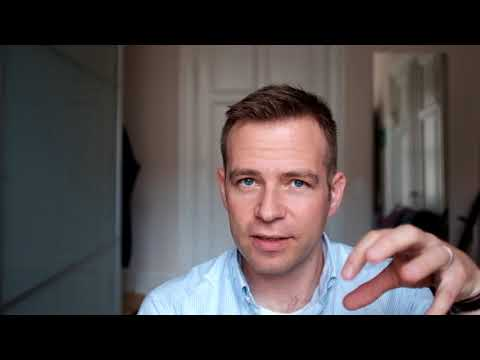

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("IOWXZFOyk9Y", width=600)



We begin with a preliminary analysis of the network.

> *Exercise 4*: Begin to analyze the network of the house of representatives.

> * Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? The density of the network?
> * What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
> * List the top 5 politicians by in-degree and out-degree. What is their party and state? Do these politicians play a particular role in the house (see [here](https://en.wikipedia.org/wiki/List_of_members_of_the_United_States_House_of_Representatives_in_the_115th_Congress_by_seniority))?
> * Plot the distribution of in-degrees and out-degrees, binned using `numpy.histogram`. What is the most common in-degree? The most common out-degree?
> * Plot the probability distribution of in-degrees and out-degrees one more time, this time plotted in loglog scale.
> * Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between? 
> * Plot a scatter plot of the the in- versus out- degree for all politicians. Comment on the relation between the two.
> * Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all politicians. What is the advantage of using a heatmap?

> *Exercise 5*: Going in depth with the structure of house of representatives network.
> 
> Above, we found the most connected politicians (using degree centrality). Now let's dig in and try to understand more about the network using more advanced features. If your network has more than one component, just work on the _giant connected component_ (GCC) in the exercises below (in a directed graph use the [_weakly_ connected component](https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.component.html)).
> 
> * Not all of the measures we'll be considering below are defined for directed graphs, thus begin by creating an [undirected version](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.DiGraph.to_undirected.html) of the graph, that we can use whenever needed. Only use the undirected graph when explicitly stated in the exercise.
> * Find the 5 most central politicians according to [betweenness centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html). What role do you imagine politicians with high wikipedia graph betweenness centrality play?
> * Find the 5 most central politicians according to [eigenvector centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html). Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). 
> * Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?
> * Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?
> * Is the _undirected version_ of the graph [assortative with respect do degree](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient)? (e.g. do high-degree politicians tend to link to other high-degree politicians, and low-degree politicians to other low-degree politicians?). Provide an interpretation of your answer. 
> * What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes and p?

> Parties and states of the members of the house plays a large role. Now, let us explore if and how they shape the network. 

> *Exercise 6*: Parties and nodes centrality.
> * Compute the average node centrality for Democratic and Republican members of the house (choose your favourite centrality measure).
> * Create a new graph, with the same number of nodes and edges and the same degree distribution, but where the association between nodes and parties is shuffled. I recommend you use `NetworkX`'s [`double_edge_swap`](https://networkx.github.io/documentation/stable/reference/algorithms/swap.html) algorithm for this purpose. The double edge-swap conserves the degree distribution, but otherwise randomizes the connections (if you 're interested in the origin of the double edge swap, you can check out [this classic network science paper](https://science.sciencemag.org/content/296/5569/910)). To create a sufficiently randomized graph, you want to run the swap-process as many times as you have links in your network, so for example if you have a graph with 1000 links, it's at least 1000 swaps (you could do 2000 to be safe).  Compute the average centrality of Republicans and Democrats nodes for this *randomized* graph. 
> * Repeat the point above 100 times (at least) and plot two histograms with the values of centrality obtained for Republicans and Democrats.
> * Compare the value you have obtained in the real graph, with the randomized cases. Are members of one of the two parties more central in the network (on average)?
> * Think about your results, what could be possible explanations for what you observe?

> *Exercise 7*: Assortativity with respect to parties and states.
> * Consider the undirected version of the graph. For each node, compute the fraction of edges that connect to a node of his/her same party. Find the average value across all nodes. 
> * Create a new graph, with the same nodes and edges, but where the association between nodes and parties is shuffled. Compute the measure above for this *randomized* graph. 
> * Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Do you find that the chance to connect to a member of the same party is higher than it would be by random chance?
> * Compute the [assortativity coefficient with respect to the party](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). How do you interpret the value you obtain? (Hint: See [this paper, eq (2)](https://arxiv.org/pdf/cond-mat/0209450.pdf)).
> * Repeat the exercise, but considering states instead of parties.
> * How do you interpret these results in light of what you have observed in Exercise 3?